# Analyzing Text about Data Science


### Challenge:Doing some text mining. We can  start with a text about Data Science, extract keywords from it, and then try to visualize the result

### we can use Data Science page from Wikipedia

In [22]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

#### Task No 1: Get the data


In [23]:
import requests

# requests.get(url) > sends an HTTP GET request to the specified url to retrieve the content of the web page
#.content > returns the raw content of the response
# .decode('utf-8') > decodes the raw content using UTF-8 encoding to convert it into a human-readable string.

response = requests.get(url)
text =response.content.decode('utf-8')
print(text[:1000])


<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";(function(){var cookie=document.cookie.match(/(?:^|; )enwikimwclientpr

#### Task No 2: Transform the data : Here the downloaded HTML source code from the page, and we need to convert it into plain text.


In [27]:
#The HTMLParser class is a built-in class in Python that provides a framework for parsing HTML.

from html.parser import HTMLParser # Imports the "HTMLParser" class from the "html.parser" module.



class MyHTMLParser(HTMLParser):
    script = False   
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

  ??  Machine learning - Wikipedia Jump to content Main menu Main menu move to sidebar hide 
		Navigation
	 Main page Contents Current events Random article About Wikipedia Contact us Donate 
		Contribute
	 Help Learn to edit Community portal Recent changes Upload file Languages Language links are at the top of the page across from the title. Search Search Create account Log in Personal tools Create account Log in 
		Pages for logged out editors  learn more Contributions Talk Contents move to sidebar hide (Top) 1 Overview 2 History and relationships to other fields Toggle History and relationships to other fields subsection 2.1 Artificial intelligence 2.2 Data mining 2.3 Generalization 2.4 Statistics 2.5 Physics 3 Theory 4 Approaches Toggle Approaches subsection 4.1 Supervised learning 4.2 Unsupervised learning 4.3 Semi-supervised learning 4.4 Reinforcement learning 4.5 Dimensionality reduction 4.6 Other types 4.6.1 Self-learning 4.6.2 Feature learning 4.6.3 Sparse dictionary learning 

In [32]:
import sys
!{sys.executable} -m pip install nlp_rake

                                              0.0/981.5 kB ? eta -:--:--
     --                                      61.4/981.5 kB 3.2 MB/s eta 0:00:01
     -----                                  143.4/981.5 kB 1.7 MB/s eta 0:00:01
     ----------                             276.5/981.5 kB 2.1 MB/s eta 0:00:01
     -------------                          358.4/981.5 kB 2.2 MB/s eta 0:00:01
     ------------------------               624.6/981.5 kB 2.8 MB/s eta 0:00:01
     -------------------------------------  972.8/981.5 kB 3.6 MB/s eta 0:00:01
     -------------------------------------- 981.5/981.5 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
                                     

In [28]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('prentice hall', 4.0),
 ('mit press', 4.0),
 ('wayback machine', 3.9711538461538463),
 ('artificial neuron', 3.9642857142857144),
 ('retrieved 2018-11-25', 3.96),
 ('statistical learning', 3.944055944055944),
 ('feature learning', 3.944055944055944),
 ('reinforcement learning', 3.944055944055944),
 ('deep learning', 3.944055944055944),
 ('machine learning', 3.91520979020979),
 ('pattern recognition', 3.909090909090909),
 ('neural networks', 3.888888888888889),
 ('retrieved 2018-08-20', 3.876666666666667),
 ('artificial intelligence', 3.864285714285714),
 ('speech recognition', 3.857142857142857),
 ('bayesian network', 3.857142857142857),
 ('statistical physics', 3.833333333333333),
 ('supervised learning', 3.8329448329448326),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('isbn 978-0-262-01243-0', 3.8),
 ('unsupervised 

#### To visualize word frequencies - using Word Cloud

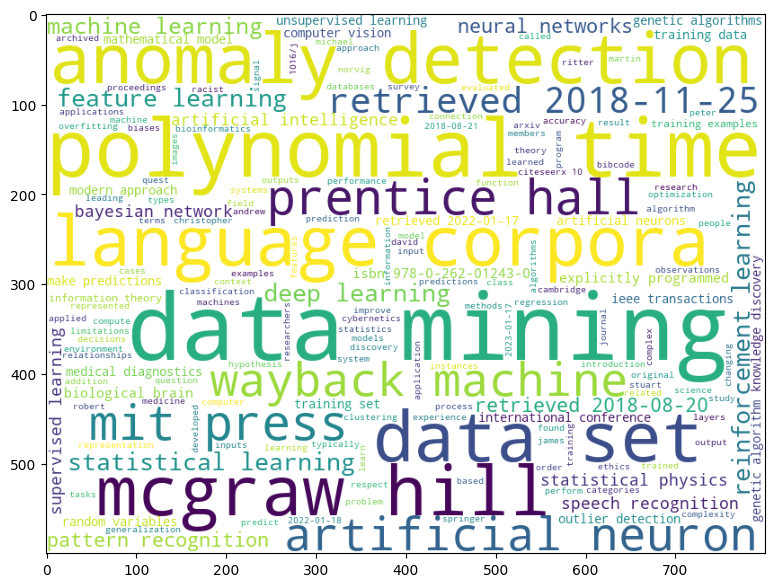

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

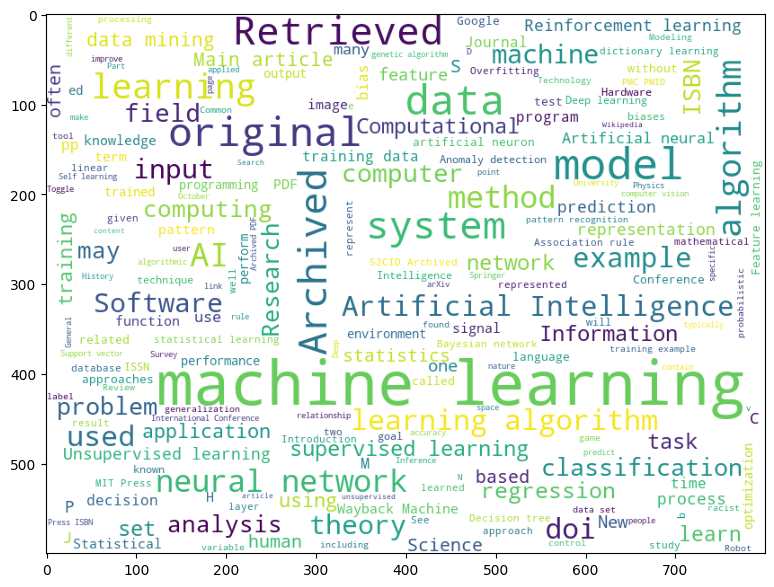

In [30]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

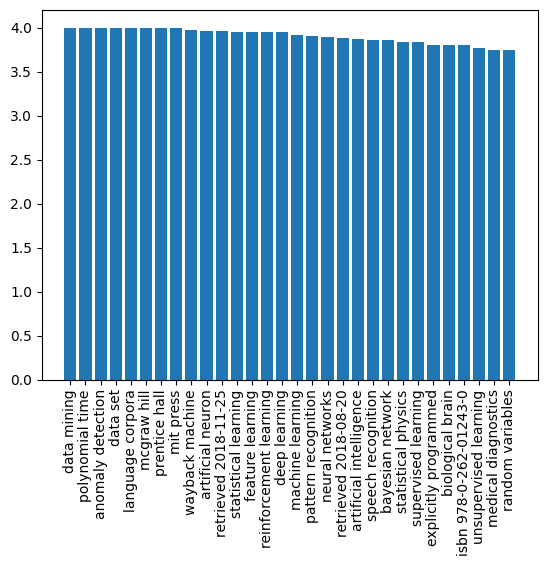

In [36]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])